<a href="https://colab.research.google.com/github/RenuSri18/Machine-Learning-projects/blob/main/Stock_Market_time_series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install yfinance numpy pandas scikit-learn tensorflow matplotlib


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [18]:
import pandas as pd

# Load dataset and check its structure
df = pd.read_csv("apple_stock_data.csv")
print(df.head())  # Check first few rows
print(df.dtypes)  # Check data types
print(df.columns)  # Check column names

# Ensure the correct index column is set
df = pd.read_csv("apple_stock_data.csv", index_col=0, parse_dates=True)

# Check for missing or non-numeric values
print(df.isnull().sum())  # Check for NaN values
print(df.applymap(lambda x: isinstance(x, str)).sum())  # Check for strings

# Drop missing values (if any)
df = df.dropna()

# Convert all columns to numeric (force conversion)
df = df.apply(pd.to_numeric, errors='coerce')

# Keep only the 'Close' column
data = df[['Close']]
print(data.head())  # Ensure it's clean

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

print("Data successfully scaled!")



        Price              Close                High                 Low  \
0      Ticker               AAPL                AAPL                AAPL   
1        Date                NaN                 NaN                 NaN   
2  2010-01-04  6.447412014007568  6.4621740257756315   6.398305598620858   
3  2010-01-05  6.458558082580566     6.4950113965004   6.424514556071699   
4  2010-01-06  6.355827331542969   6.484167138135582  6.3491993087984255   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2   6.429938538443087  493729600  
3  6.4651861041058405  601904800  
4   6.458559270675418  552160000  
Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object
Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
Close     3523
High      3523
Low       3523
Open      3523
Volume   

<ipython-input-18-54606853ff19>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("apple_stock_data.csv", index_col=0, parse_dates=True)
<ipython-input-18-54606853ff19>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: isinstance(x, str)).sum())  # Check for strings


In [19]:
def create_sequences(data, seq_length=50):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y)

# Define sequence length
SEQ_LENGTH = 50

# Create sequences
X_train, Y_train = create_sequences(train_data, SEQ_LENGTH)
X_test, Y_test = create_sequences(test_data, SEQ_LENGTH)

# Reshape input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (2767, 50, 1)
X_test shape: (655, 50, 1)


In [20]:
# Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    Dropout(0.2),
    LSTM(100, return_sequences=False),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,301 (493.36 KB)

 Trainable params: 126,301 (493.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 5.0156e-04 - val_loss: 0.0037
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 3.5287e-04 - val_loss: 0.0036
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 3.3705e-04 - val_loss: 0.0062
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 3.0185e-04 - val_loss: 9.0770e-04
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 2.4340e-04 - val_loss: 0.0012
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 2.9606e-04 - val_loss: 0.0048
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 2.6520e-04 - val_loss: 0.0054
Epoch 9/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 2.2851e-04 - val_loss: 0.0073
Epoch 10/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - loss: 2.7273e-04 - val_loss: 0.0040
Epoch 11/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 2.1285e-04 - val_loss: 0.0044
Epoch 12/20

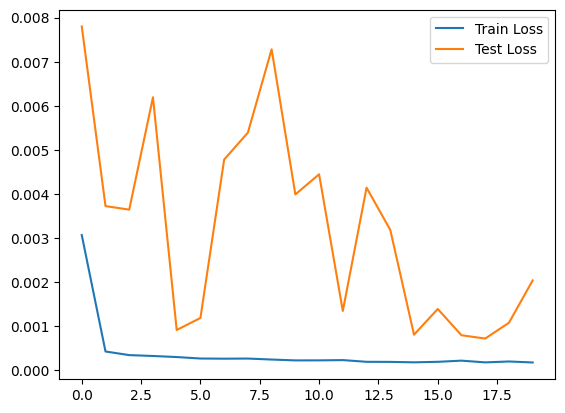

In [21]:
# Train model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()


In [22]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
Y_train_actual = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))


87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


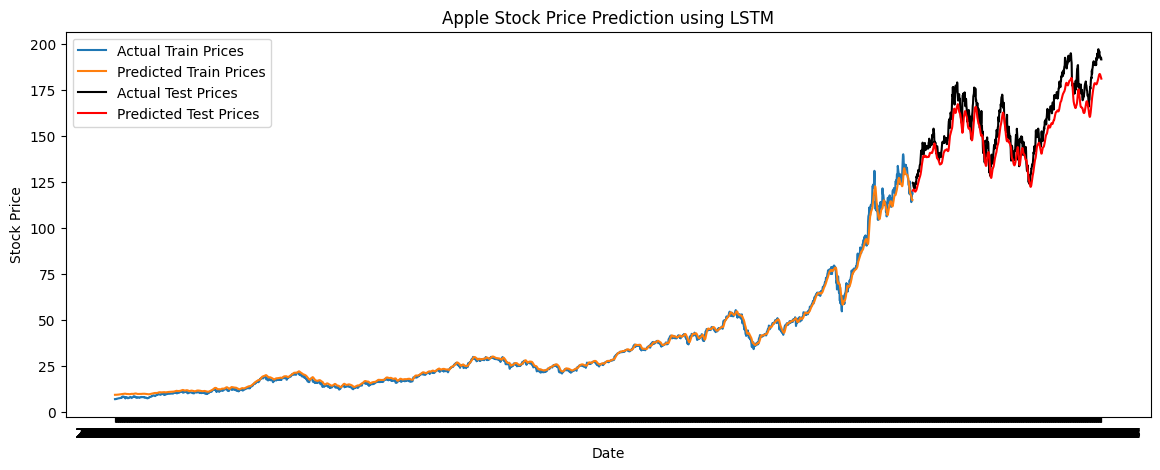

In [24]:
# Adjust the indexing to ensure the lengths match
plt.figure(figsize=(14, 5))
plt.plot(df.index[SEQ_LENGTH:train_size], Y_train_actual, label="Actual Train Prices")
plt.plot(df.index[SEQ_LENGTH:train_size], train_predictions, label="Predicted Train Prices")

# Adjust the slicing for X-axis of the Test plot to match the length of Y_test_actual
plt.plot(df.index[train_size + SEQ_LENGTH: train_size + SEQ_LENGTH + Y_test_actual.shape[0]],
         Y_test_actual, label="Actual Test Prices", color='black')
plt.plot(df.index[train_size + SEQ_LENGTH: train_size + SEQ_LENGTH + test_predictions.shape[0]],
         test_predictions, label="Predicted Test Prices", color='red')

plt.legend()
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Apple Stock Price Prediction using LSTM")
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate errors
mse = mean_squared_error(Y_test_actual, test_predictions)
mae = mean_absolute_error(Y_test_actual, test_predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 74.46032887580617
Mean Absolute Error: 7.562196885902463
